# K-Means Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data preparation

In [2]:
# Importing the dataset
df = pd.read_csv('bank.csv')
df = df.drop(['id'], axis=1)

In [4]:
df

,age,sex,income,married,children,car,mortgage,delays
0,48,FEMALE,17546.00,NO,1,NO,NO,YES
1,40,MALE,30085.10,YES,3,YES,YES,NO
2,51,FEMALE,16575.40,YES,0,YES,NO,YES
3,23,FEMALE,20375.40,YES,3,NO,NO,YES
4,57,FEMALE,50576.30,YES,0,NO,NO,NO
...,...,...,...,...,...,...,...,...
595,61,FEMALE,47025.00,NO,2,YES,YES,NO
596,30,FEMALE,9672.25,YES,0,YES,NO,YES
597,31,FEMALE,15976.30,YES,0,YES,NO,YES
598,29,MALE,14711.80,YES,0,NO,YES,YES


In [3]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [4]:
# Encoding categorical data
df = encoding_char(df)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['age','sex','income','married','children','car','mortgage','delays']).round()

,age,sex,income,married,children,car,mortgage,delays
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
595,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
596,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
597,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
598,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## Number of clusters

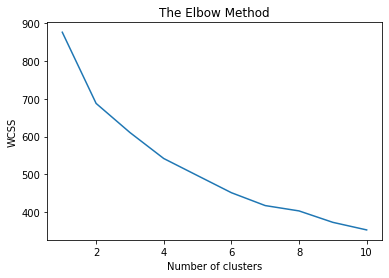

In [7]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

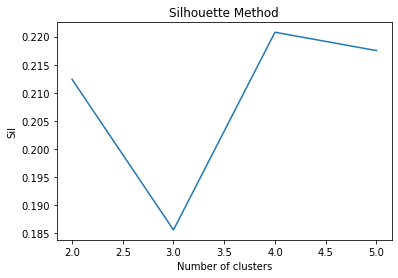

2:0.21240874808835405
3:0.18562201933842729
4:0.2207817002400442
5:0.2175210241518846


In [9]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

## Model

In [8]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['age','sex','income','married','children','car','mortgage','delays']).round(2)

,age,sex,income,married,children,car,mortgage,delays
0,0.67,0.54,0.54,0.68,0.30,0.52,1.00,1.0
1,0.34,0.00,0.23,0.66,0.34,0.46,0.30,-0.0
2,0.28,1.00,0.22,0.63,0.30,0.44,0.37,-0.0
3,0.70,0.47,0.56,0.68,0.38,0.54,0.00,1.0


## Feature Reduction

In [9]:
# Less features
X = df[:, [0, 2, 7]]

In [11]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['age','income','delays']).round()

,age,income,delays
0,0.0,0.0,-0.0
1,1.0,1.0,1.0


## Results matching

In [13]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [14]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.672

## Pickle results

In [15]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()